In [1]:
# Try to Get the images ==> Feeding Keras with our own dataset

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import PIL
import os
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils

In [28]:
path = "/media/amrgalal7/Files/GesturesDataset/"
root_folders = os.listdir(path)
import cv2

In [29]:
root_folders

['Class1',
 'Class1_resized',
 'Class1_resized_resized',
 'Class2',
 'Class2_resized',
 'Class2_resized_resized',
 'Class3',
 'Class3_resized',
 'Class3_resized_resized',
 'Class4',
 'Class4_resized',
 'Class4_resized_resized',
 'Class5',
 'Class5_resized',
 'Class5_resized_resized',
 'Class6',
 'Class6_resized',
 'Class6_resized_resized',
 'Class7',
 'Class7_resized',
 'Class7_resized_resized',
 'Class8',
 'Class8_resized',
 'Class8_resized_resized',
 'Class9',
 'Class9_resized',
 'Class9_resized_resized']

In [74]:
images_files = root_folders
images_samples = len(images_files)
print(images_samples)
img_width = 128
img_height = 128

27


In [30]:
for folder_name in images_files:
    os.makedirs(path + folder_name + "_resized", exist_ok = True)
    imagesin_file = os.listdir(path + folder_name)
    if folder_name.find("_resized") == -1:
        for file in imagesin_file:    
            im = cv2.imread(path + folder_name +  "//" + file)
            img = cv2.resize(im, (img_width , img_height))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
            cv2.imwrite(path + folder_name + "_resized" + "//" + file , thresh)

KeyboardInterrupt: 

In [81]:
# Get the Resized & Gray Scale Images
# images_resized = os.listdir(current_path + );
# img_1 = np.array(Image.open(path2 + "\\" + images_resized[0])) # to get the Size of the Images
# m , n = img_1.shape[0:2]
# images_numbers = len(images_resized)

In [68]:
# Flatten the Images to store in Matrix
count = 0
for folder_name in images_files:
    if folder_name.find("_resized") != -1:
        imagesin_file = os.listdir(path + "//" + folder_name)
        if count == 0:
            images_matrix = np.array([
                np.array(Image.open(path + "//" + folder_name + "//"  + file)).flatten() for file in imagesin_file
            ],'f')
            count = count + 1
        else:
            images_matrix = np.append(images_matrix ,np.array([np.array(Image.open(path + "//" + folder_name  + "//" + file)).flatten() for file in imagesin_file], 'f'), axis=0) 

In [69]:
images_matrix.shape

(9000, 16384)

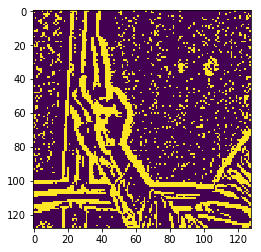

In [70]:
%matplotlib inline
images_samples = images_matrix.shape[0]
labels = np.ones((images_samples,),dtype= int)
count = 1000
start = 0
for counter in range(10):
    labels[start:count] = counter
    start = count
    count = count + 1000

    
# labels[9999]
# labels = np.ones((images_samples,))
# image_sample = images_matrix[1502].reshape(img_width , img_height)
# plt.imshow(image_sample)

image_sample = images_matrix[1500].reshape(img_width , img_height)
plt.imshow(image_sample)

In [71]:
labels

array([0, 0, 0, ..., 8, 8, 8])

In [72]:
images_matrix.shape

(9000, 16384)

In [73]:
data , label = shuffle(images_matrix , labels ,random_state = 2)

In [74]:
train_data = [data , label]
%matplotlib inline

In [75]:
# Make the Train and Test Dataset
(X ,Y) = (train_data[0] , train_data[1])


X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=4)


X_train = X_train.reshape(-1 ,img_width ,img_height , 1)
X_test = X_test.reshape(-1, img_width , img_height, 1)

In [76]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
nb_classes = 9 # For the Softmax fo the 10 Gesture but I use now just 1 class
# Convert vectors to matrices
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)
# X_train.shape

X_train Shape :  (7200, 128, 128, 1)
X_test Shape :  (1800, 128, 128, 1)
Y_train Shape :  (7200, 9)
Y_test Shape :  (1800, 9)


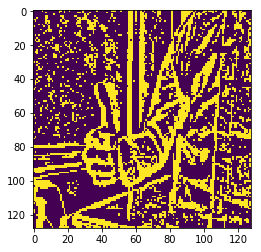

In [77]:
plt.imshow(X_train[555 , : , : , 0] , interpolation='nearest')

# Size of train and test matrices
print("X_train Shape : ",X_train.shape)
print("X_test Shape : " , X_test.shape)
print("Y_train Shape : " , Y_train.shape)
print("Y_test Shape : " , Y_test.shape)

In [76]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.layers import Flatten, Activation
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Conv2D
import keras.backend as K
from keras.optimizers import Adam

K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'nb_classes' is not defined

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16257152  
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
__________

In [80]:
model.fit(X_train,Y_train, batch_size=32,
          epochs=3, verbose=1, validation_split=0.3)

Train on 5040 samples, validate on 2160 samples
Epoch 1/3
5040/5040 [==============================] - 58s 12ms/step - loss: 0.3842 - acc: 0.9220 - val_loss: 0.0275 - val_acc: 0.9986
Epoch 2/3
5040/5040 [==============================] - 57s 11ms/step - loss: 0.0117 - acc: 0.9998 - val_loss: 0.0100 - val_acc: 0.9995
Epoch 3/3
5040/5040 [==============================] - 56s 11ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 0.9986


In [81]:
model.evaluate(X_test, Y_test)

1800/1800 [==============================] - 3s 2ms/step


[0.0036267184093594553, 1.0]

In [3]:
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.models import load_model
import cv2

model = load_model('model2.h5')
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# im = cv2.imread(path + '/Class9/952.png')
# img = cv2.resize(im, (img_width , img_height))
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# images_matrix2 = np.array(thresh).flatten()


# images_matrix2 = images_matrix2.reshape(-1 , img_width , img_height , 1)

# images_matrix2.shape
# classes = model.predict_classes(images_matrix2, batch_size=10)
# print(classes)

InternalError: Dst tensor is not initialized.
	 [[Node: _arg_Placeholder_11_0_1/_177 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_80__arg_Placeholder_11_0_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

In [93]:
model.save('model3.h5')

In [100]:


%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display



In [101]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

    
import signal

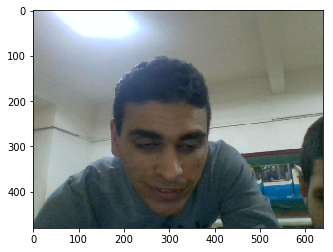

In [103]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False
while is_capturing:
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview.set_data(frame)
    plt.draw()

    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass
    if is_interrupted:
        vc.release()
        break